In [1]:
#importing libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib.ticker import FixedLocator
from statsmodels.tsa.stattools import adfuller
import itertools
import warnings
warnings.filterwarnings('ignore')

C:\Users\joypa\AppData\Local\Temp\ipykernel_14324\2928888324.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Read the CSV file into pandas DataFrame
df = pd.read_csv('F:/Works/Collaborative Application Development/Day Data/D19_updated_days.csv', parse_dates=['Date'], index_col=['Date'])  # Replace with the actual file path
print(df)

            Total Registered      Day
Date                                 
2019-07-16               125    Day 1
2019-07-17                 1    Day 2
2019-07-18                 1    Day 3
2019-07-19                 1    Day 4
2019-07-20                 1    Day 5
...                      ...      ...
2019-11-14                22  Day 122
2019-11-15                45  Day 123
2019-11-16                 1  Day 124
2019-11-17                 1  Day 125
2019-11-18                45  Day 126

[126 rows x 2 columns]


In [3]:
# Drop the 'Date' column from DataFrame
df = df.drop('Day', axis=1)
print(df)

            Total Registered
Date                        
2019-07-16               125
2019-07-17                 1
2019-07-18                 1
2019-07-19                 1
2019-07-20                 1
...                      ...
2019-11-14                22
2019-11-15                45
2019-11-16                 1
2019-11-17                 1
2019-11-18                45

[126 rows x 1 columns]


In [4]:
#checking null values
df.isnull().sum()

Total Registered    0
dtype: int64

In [5]:
# Extract 'Total Registered' column
total_registered = df['Total Registered']
print(total_registered)

Date
2019-07-16    125
2019-07-17      1
2019-07-18      1
2019-07-19      1
2019-07-20      1
             ... 
2019-11-14     22
2019-11-15     45
2019-11-16      1
2019-11-17      1
2019-11-18     45
Name: Total Registered, Length: 126, dtype: int64


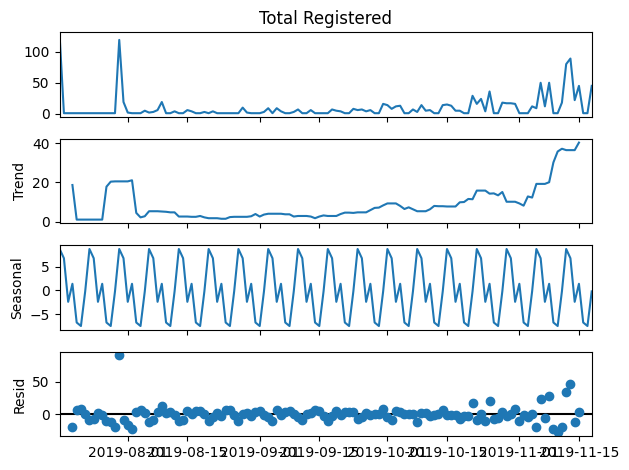

In [6]:
#Stationarity Check (for 'additive')
decomposition = sm.tsa.seasonal_decompose(total_registered, model='additive')
fig1 = decomposition.plot()
plt.show()

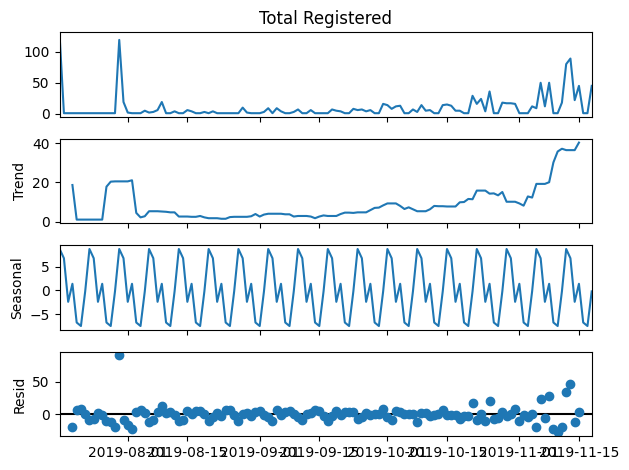

In [7]:
#Stationarity Check (for 'multiplicative')
decomposition1 = sm.tsa.seasonal_decompose(total_registered, model='multiplicative')
fig2 = decomposition.plot()
plt.show()

In [8]:
#pvalue> 0.05 -----> not stationary
#Dickey-Fuller Test
adftest = adfuller(total_registered)
print('pvalue of adfuller test is: ', adftest[1])

pvalue of adfuller test is:  0.9970688395957419


In [9]:
# Check the length of the total_registered series
len(total_registered)

126

In [11]:
#train-test split
train = total_registered[:101]
test = total_registered[101:]

In [68]:
# Fit ARIMA model to the training data
model = ARIMA(train, order=(0, 1, 1)).fit()

In [69]:
# Print the lengths of the training data and the total_registered series
len(train), len(total_registered-1)

(353, 442)

In [70]:
# Use the trained model to predict future values
pred = model.predict(len(train), len(total_registered)-1)
print(pred)

2021-01-24    1.567381
2021-01-25    1.567381
2021-01-26    1.567381
2021-01-27    1.567381
2021-01-28    1.567381
                ...   
2021-04-18    1.567381
2021-04-19    1.567381
2021-04-20    1.567381
2021-04-21    1.567381
2021-04-22    1.567381
Freq: D, Name: predicted_mean, Length: 89, dtype: float64


In [71]:
# Calculate the Root Mean Squared Error (RMSE)
error = np.sqrt(mean_squared_error(test, pred))
print(error)

12.209868204141703


In [72]:
# Print the mean and standard deviation of the test set
test.mean(), np.sqrt(test.var())

(7.707865168539326, 10.613244563442043)

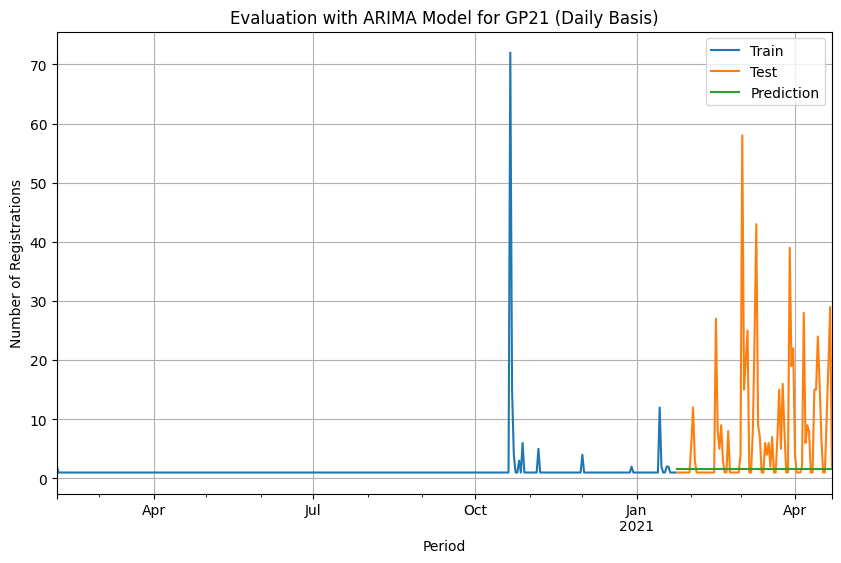

In [73]:
#Plotting the evaluation graph
train.plot(legend = True, label = 'Train', figsize = (10, 6))
test.plot(legend = True, label = 'Test')
pred.plot(legend = True, label = 'Prediction')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Number of Registrations')
plt.title('Evaluation with ARIMA Model for GP21 (Daily Basis)')
plt.grid(True)

# Save the figure
#plt.savefig('F:/Works/Collaborative Application Development/Python/Images/Arima/Daily/Training/GP21_Arima_Daily.png')

In [74]:
# Train the ARIMA model on the entire dataset
final_model = ARIMA(total_registered, order=(0, 1, 1)).fit()

In [75]:
# Forecast the next 50 days
prediction = final_model.predict(len(total_registered), len(total_registered) + 50)
print(prediction)

2021-04-23    10.449914
2021-04-24    10.449914
2021-04-25    10.449914
2021-04-26    10.449914
2021-04-27    10.449914
2021-04-28    10.449914
2021-04-29    10.449914
2021-04-30    10.449914
2021-05-01    10.449914
2021-05-02    10.449914
2021-05-03    10.449914
2021-05-04    10.449914
2021-05-05    10.449914
2021-05-06    10.449914
2021-05-07    10.449914
2021-05-08    10.449914
2021-05-09    10.449914
2021-05-10    10.449914
2021-05-11    10.449914
2021-05-12    10.449914
2021-05-13    10.449914
2021-05-14    10.449914
2021-05-15    10.449914
2021-05-16    10.449914
2021-05-17    10.449914
2021-05-18    10.449914
2021-05-19    10.449914
2021-05-20    10.449914
2021-05-21    10.449914
2021-05-22    10.449914
2021-05-23    10.449914
2021-05-24    10.449914
2021-05-25    10.449914
2021-05-26    10.449914
2021-05-27    10.449914
2021-05-28    10.449914
2021-05-29    10.449914
2021-05-30    10.449914
2021-05-31    10.449914
2021-06-01    10.449914
2021-06-02    10.449914
2021-06-03    10

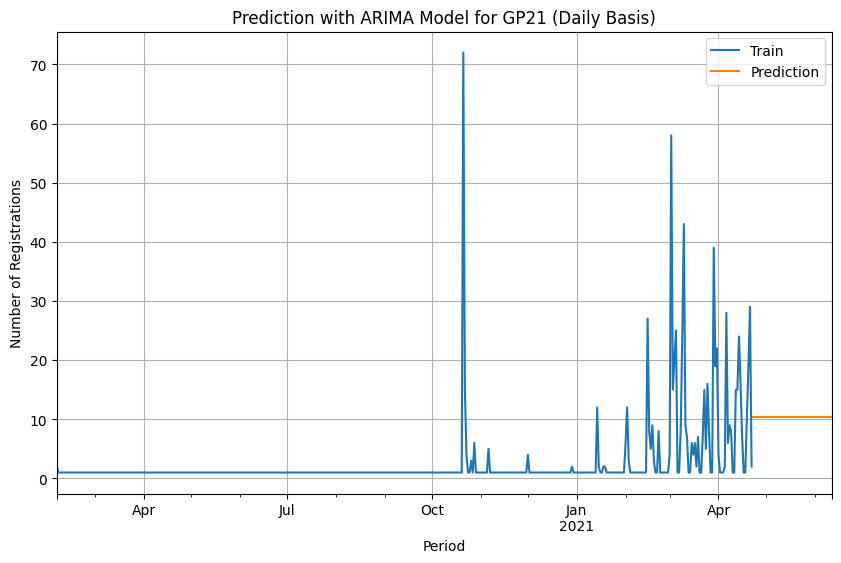

In [76]:
#Plotting the prediction graph
total_registered.plot(legend = True, label = 'Train', figsize = (10, 6))
prediction.plot(legend = True, label = 'Prediction')

# Add labels and title
plt.xlabel('Period')
plt.ylabel('Number of Registrations')
plt.title('Prediction with ARIMA Model for GP21 (Daily Basis)')
plt.grid(True)

# Save the figure
#plt.savefig('F:/Works/Collaborative Application Development/Python/Images/Arima/Daily/Prediction/GP21_Arima_Daily.png')

In [155]:
#..............................................Finding optimal Hyperparameters..................................................#

In [12]:
#finding p,q,d values

p = range(0,8)
q = range(0,8)
d = range(0,2)
pdq_combination = list(itertools.product(p,d,q))
len(pdq_combination)

128

In [13]:
#analysing pdq combination
rmse = []
order1 = []
for pdq in pdq_combination:
    try:
        model1 = ARIMA(train, order = pdq).fit()
        pred = model1.predict(len(train), len(total_registered)-1)
        error = np.sqrt(mean_squared_error(test, pred))
        order1.append(pdq)
        rmse.append(error)
    except Exception as e:
        print(f'Error fitting model for parameter {pdq}: {str(e)}')
        continue

In [14]:
#outcome in DataFrame
result = pd.DataFrame(index = order1, data = rmse, columns = ['RMSE'])
#print(result)
print(result.sort_values(by='RMSE'))

                RMSE
(3, 1, 0)  25.781375
(4, 1, 0)  25.963981
(5, 1, 0)  26.202755
(6, 1, 0)  26.305898
(7, 1, 0)  26.374744
...              ...
(4, 0, 6)  29.910903
(3, 0, 2)  30.008848
(7, 0, 6)  30.036961
(2, 0, 2)  30.142975
(0, 1, 0)  30.365112

[128 rows x 1 columns]
